# 前言

**本文参照特征工程这本书，完整地完成一套流程**

# 加载数据

In [2]:
import pandas as pd

import os

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '1. Titanic数据预处理.ipynb',
 'gender_submission.csv',
 'train.csv',
 '.git',
 'test.csv',
 '参照特征工程入门这本书.ipynb',
 '参考另一个.ipynb',
 'README.md']

In [5]:
train = pd.read_csv('train.csv')

In [7]:
test = pd.read_csv('test.csv')

# 数据预处理

这部分主要完成数据的缺失值填充

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

****
从这里可以看出 Age Cabin Embarked是有缺失值的

所以需要填充这些缺失值。但Cabin的缺失值太多，我们先丢弃这一列

In [11]:
train.drop('Cabin', axis=1, inplace=True)

Age 是定量数据

Embarked 是定类数据

- 定类数据用众数填充缺失值
- 定量数据用中位数或者平均数填充缺失值

In [13]:
train['Age'].fillna(train.Age.median(), inplace=True)
train['Embarked'].fillna(train.Embarked.mode()[0], inplace=True)

In [15]:
# abs可以发现缺失值填充完成
train.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [16]:
columns_list = train.columns.tolist()

In [17]:
columns_list

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

# 特征理解

## 特征等级说明

****
**这一部分主要是对数据类型进行理解，数据首先可以分成 定性数据和定量数据**

**定量数据：本质上是数值，描述一个特征的数量**

**定性数据：本质上是类别，描述一个特征的种类**
****

**定性数据：pclass，name，sex，ticked，pclass**

**定量数据：age，sibsp，parch，fare**
****

然而还可以继续进行分类，定性数据还可以分成：

- 定类等级
- 定序等级
- 定距等级
- 定比等级

定类等级：如性别，就是分成男性和女性

定序等级：pclass，虽然也是类别，但我们希望某些类别数值越大越好。如不喜欢，一般，喜欢三个层度

定距等级：主要是针对定量数据。但和定序数据类似。不仅可以对数据进行排序，还可以数据进行加减。如温度。这类数据要用直方图查看

定比等级：定比等级还可以进行乘除运算。

****
定类等级：survived，name，sex，ticked

定序等级：pclass

定距等级：sibsp，parch

定比等级：age，fare

## 特征等级的图像描述方法

**定距等级和定比等级可以用直方图来描述。不能用饼状图或者是条形图来描述**

**定类等级和定序等级可以使用条形图描述**

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

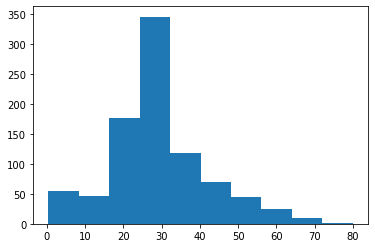

In [20]:
plt.hist(train.Age)

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

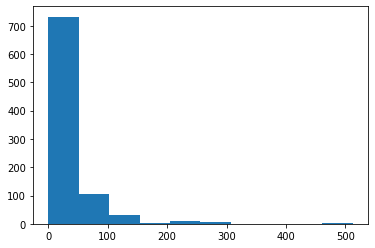

In [22]:
plt.hist(train.Fare)

**对定类数据使用条形图来观察**

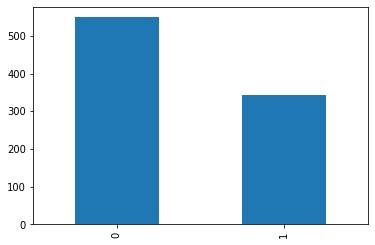

In [25]:
train.Survived.value_counts().plot(kind='bar')

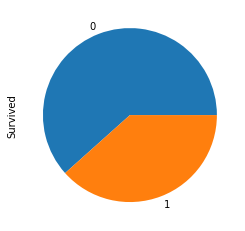

In [26]:
train.Survived.value_counts().plot(kind='pie')